In [ ]:
# importing libraries
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import poisson

from scipy.stats import uniform
from scipy.stats import expon
from scipy.stats import norm

# Discrete Distributions

In [ ]:
#Here we are going to create an experiment of trowing 10000 pairs of dices and get the sum of the result

import random

throw_10000_pairsofdice = [random.randint(1,6)+random.randint(1,6) for i in range(10000)]
#throw_10000_pairsofdice

In [ ]:
#Show
random.randint(1,6)

2

In [ ]:
#Do all this numberes have the same liklyhood of happening? 
throw_10000_pairsofdice

In [ ]:
# Now let's create here a dictionary with the count of the results we got

count_of_result = {2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}
for result in throw_10000_pairsofdice:
  count_of_result[result] = count_of_result[result]+1
#count_of_result

In [ ]:
# let's put all into a DataFrame

count_df = pd.DataFrame(pd.Series(count_of_result),columns=['count'])
count_df

,count
2,327
3,559
4,814
5,1080
6,1376
7,1661
8,1391
9,1108
10,876
11,537


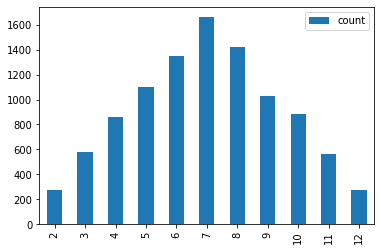

In [ ]:
## create a bar chart with the count of every result I got in my y axis
# count_df.plot(kind='bar',y='count')

## Does this make sense for everyone? 

In [ ]:
## Now intead of having the absulute value here I'm going to comput the frequency, the percentage
## that I get for each value.
## How do I do this?

count_df['frequency'] = count_df['count']/10000
count_df

## This means the probability of getting a 2, a 3 a 4 ...


,count,frequency
2,327,0.0327
3,559,0.0559
4,814,0.0814
5,1080,0.1080
6,1376,0.1376
7,1661,0.1661
8,1391,0.1391
9,1108,0.1108
10,876,0.0876
11,537,0.0537


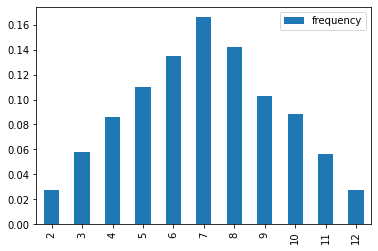

In [ ]:
count_df.plot(kind='bar',y='frequency')
#This is the PMF for two dice (experimental)

## This is what is called the EMPIRICAL APPROXIMATION (it's empirical because I did it through an experiment).
## This is the EMPIRICAL APPROXIMATIOn of something called the PMF (probability mass function).

In [ ]:
## So if I ask you what is the probability of getting an 8 for the sum of the values got in the pair of dices,
## you can just come here to this chart and say is rughfly 15%.

## So this PMF is the chart that allows you to comput the probability of a speific value.

**Probability Mass Function (PMF)** (def) Let X be a discrete random variable with range R<sub>X</sub> = {x<sub>1</sub>, x<sub>2</sub>, ...} finite or countably infinite. The function   

> P<sub>X</sub>(x<sub>k</sub>) = P(x = x<sub>k</sub>)   k = 1, ...

is called Probability Mass Function.

In [ ]:
## Another common thing here is the question, what is the probability of getting a result of 8 or smaller?
## we can do it with a method that you haven't seen before which is cumsum()

count_df['cum_frequency'] = count_df['frequency'].cumsum()
count_df

,count,frequency,cum_frequency
2,327,0.0327,0.0327
3,559,0.0559,0.0886
4,814,0.0814,0.1700
5,1080,0.1080,0.2780
6,1376,0.1376,0.4156
7,1661,0.1661,0.5817
8,1391,0.1391,0.7208
9,1108,0.1108,0.8316
10,876,0.0876,0.9192
11,537,0.0537,0.9729


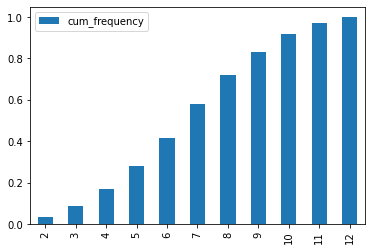

In [ ]:
count_df.plot(kind='bar',y='cum_frequency')
#This is the CDF for two dices (experimental)

## Of course this is an abstract situation here, with the dice throws, and you could ask me when do I need to use this?
## For e.g if this was the 1000 dollares you make with a new costumer. You could ask, ok what is the probability that a
## new costumer makes me win between 5 and 10000 dollars?


In [ ]:
# This here is what we call the commulative Cumulative Destribution Function 


**Cumulative Distribution Function (CDF)** (def) Let X be a random variable. The function   

> F<sub>X</sub>(x) = P(X <= x) 

is called Cumulative Density Function.

# Continuous Distribution


In [ ]:
## What we were doing up until now was experiments where may data is DESCREATE. 
## WERE MY DATA CAN ONLY TAKE CERTAIN VALUES in a specific range.

## But in real life things that you observe can take any ARBITRARY value.
## For this situations we use continuos distributions.

## And the one we will see the most in the continuos distributions is the NORMAL DISTRIBUTION.
## The normal distribution is built upon repeating an experiment multiple multiple times 
## E.g It can be taking the hights of individuals.
## E.g It can be a new client is comming and it has a signing value.

## It's an experiment that you take and repeat and repeat many times.

In [ ]:
##generates an array of shape (d0, d1, ..., dn), filled with random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1. 

np.random.randn(1000)

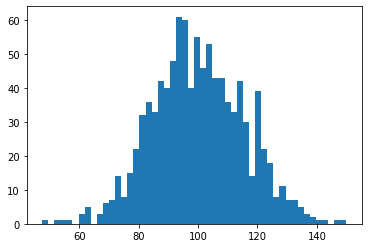

In [ ]:
## Genrate a normal distribution with location aroun 100 and std of 15 

mu, sigma = 100, 15 # change std to 30. What happens ?
x = mu + sigma * np.random.randn(1000)
# the histogram of the data
plt.hist(x, 50)
plt.show()

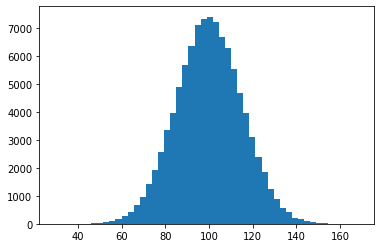

In [ ]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(100000)
# the histogram of the data
plt.hist(x, 50)
plt.show()

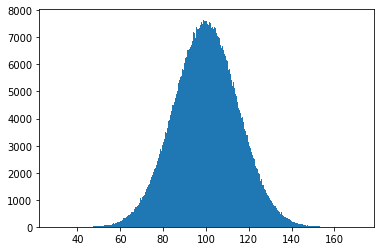

In [ ]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(1000000)
# the histogram of the data
plt.hist(x, 500)
plt.show()

In [ ]:
## In this continuos distribution the probability of getthing the same value twice is infinitesim small. Check this:

mu + sigma * np.random.randn(1)

## So in this cases it doesn't make sense to ask for the probability mass function because I will never have the same 
## individual point more than once.
## In this cases it only make sense to ask for the Comulative distribution function. 
## Which allows us to see what is the probability of getting a value between 100 and 115 for example.
## So this is the only that makes sense when talking about continuous distributions.

array([113.70670616])

In [ ]:
## probability of getting a value between 100 and 115:

len(x[x<=115])/len(x) - len(x[x<=100])/len(x)

## what is the probability of getting a value between 85 and 115?

len(x[x<=115])/len(x) - len(x[x<=85])/len(x)


0.682425

**Cumulative Distribution Function (CDF)** (def) of a random variable.
> F<sub>X</sub>(x) = P(X <= x)   for all x E IR

For all a <= b we have P(a < X <= b) = F <sub>X</sub>(b) - F <sub>X</sub>(a)

**Expectation** is the average in probability-talk

**Variance** How spread out the distribution of a random variable is. 

In [ ]:
## We know that some phenomenas don't follow a normal distribution so why do we care so much about the normal distribution?

## Becausse a lot of natural phenomenas follow a very complex system where some of their components will try to pull it to one side and others to
## another side. But the aggregated effect will
## have something that stay in the middle, but some few times it will go to one side or another
## let's check this example:
## https://www.compadre.org/osp/EJSS/3965/109.htm

In [ ]:
## But there are other systems mainly situations that are created by humans, and in some of this situations we may want to use other distributions,
## that are not a normal distribution.
## And that is what we are goint to see now.

In [ ]:
## The first one we are goint to see is the bernuli distribution.
## It's not exactlly a distribution but it is used to define other more interesting cases.

## It essentally mesures when you have a situation where you can have either a result or it's oposit.
## E.g flip a coin
## E.g You pick a person in the street, or they are a potential costumer or not
## E.g You pick a company, and they are a potential supplier or not
## E.g You pick a transaction it either is fraudulent or not

## All of this we model with a Bernulli distribution. The bernulli distribution need just one thing to be modeled.
## And this thing is a parameter.

## A PARAMETER is a number that allows you to define a distribution

## And for the bernulli this parameter is the probability of sucess

## Bernuli
Two events collectively exhaustive, like a coin-flip. Models a single success or failure of an experiment. The parameter p is the probability of success. 


0.19999999999999998
0.0
0.8
0.19999999999999996
0.19999999999999996
1.0
0.8
[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1]


(array([199813.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 800187.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

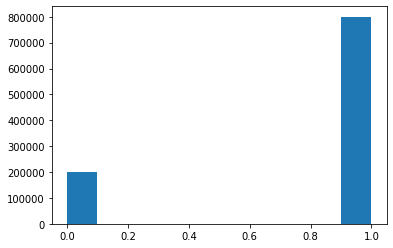

In [ ]:
## Here I will emulate a picking certain indvidual in the street, and I know that I have a 0.8 probability that it can be 
## our cosumer 

from scipy.stats import bernoulli

p = 0.8

bernoulli_dist = bernoulli(p)

## The bernuli can only take the values of 0 and 1

print(bernoulli_dist.pmf(0)) #
print(bernoulli_dist.pmf(0.5)) # 
print(bernoulli_dist.pmf(1)) # 


print(bernoulli_dist.cdf(0))
print(bernoulli_dist.cdf(0.5))
print(bernoulli_dist.cdf(1))


print(bernoulli_dist.mean()) ## the mean is the expectation, is the parameter in the bernuli

print(bernoulli_dist.rvs(100))

# plotting
X = bernoulli_dist.rvs(size=1000000)
plt.hist(X, align='mid')

In [ ]:
## One more interesting distribution is the Binomial distribution

## In this distribution you have a certain number of trials where each individual can be either a suceess or a failure.
## And you need to figure it our how many sucesses you will have.

## Binomial Distribution

Probability of having k successes in n independent trials with individual success probability p.

In [ ]:
#example: covid vaccines (20 suppliers) 

0.11718750000000014
0.9453125
5.0
2.5
1.5811388300841898
[5 6 5 9 5 5 6 4 6 7 8 6 5 6 6 2 6 5 8 7]


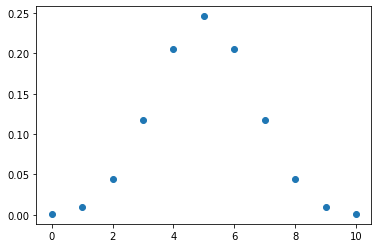

In [ ]:
from scipy.stats import binom

## Let's thing about this example. Before the vacines been released by compannies, the governement had to contact some suppliers 
## in order to when they are ready you can vacinante all of your population. So imagine that each companie had a probability of developing the vaine of 50%.
## And if the governament had promise to buy to each supplier 10000 vacines and the population you need to adminester the vacine is 30000 people.
## how many supplieres should the governament contact?

## Let's say the governament contracts with 10 labs. 
## Is this enough to vacinate this 30000 people?

## So what is the chance of at leat 3 labs produce the vacine? Because each lab produces 10000 vacines so if we have 3 labs producing the vacine we are ok!


n=10
p=0.5

binomial_dist = binom(n,p)

print(binomial_dist.pmf(3))

print(1-binomial_dist.cdf(2)) # = binomial_dist.pmf(3) + binomial_dist.pmf(4) + binomial_dist.pmf(5) + binomial_dist.pmf(6) + binomial_dist.pmf(7) + binomial_dist.pmf(8) + binomial_dist.pmf(9) + binomial_dist.pmf(10)

#attention to mean
print(binomial_dist.mean())
print(binomial_dist.var())
print(binomial_dist.std())

print(binomial_dist.rvs(20))

x = np.arange(0,11)

plt.plot(x, binomial_dist.pmf(x),"o")
#plt.plot(x, binomial_dist.cdf(x),"o")

In [ ]:

# Example
# A plane has 240 seats. Each individual passenger has a 3% chance of missing it's flight. Airlines sell more tickets than they have seats available
# this despicable practive is called overbooking
# if the company routinely sells 245 tickets, what is the chance that they have a seats for all passenger?

n=245
p=0.97
binomial_dist = binom(n,p)

binomial_dist.cdf(240)

#and if the company is willing to pay 2 refunds?

binomial_dist.cdf(242)

0.9786575415135859

In [ ]:
# or 

n=245
p=0.03
binomial_dist = binom(n,p)

1 - binomial_dist.cdf(4)


#and if the company is willing to pay 2 refunds?

1 - binomial_dist.cdf(2)

0.9786575415135859

In [ ]:
## Now this distribution I'm going to talk here is a distribution that tracks how many tries you have to do in order to have a sucess.
## And this distribution is called the geometric destribution

## Geometric Distribution

Number of trials until first success. Individual trials with probability p.

In [ ]:
# example: job applications and ironhack career services 

In [ ]:
from scipy.stats import geom

p = 0.2 ## the prob of getting a job offer after an interview is 0.2

geometric_dist = geom(p)

print(geometric_dist.pmf(1)) # (0.2)

print(geometric_dist.pmf(2)) # (0.8) * (0.2)
## is this clear that this probability is smaller ?

print(geometric_dist.pmf(3)) # (0.8) * (0.8) * (0.2)

# what is interesting here is to see if I'm going to have a job offer before a 6 interview. Or for example I'm not interested inf I'm passing the 
# exame at my 5 try. What is interessenting is to understand what is the chance that I will pass my exame before my 6 try.

#print(geometric_dist.cdf(5))

#What are the chances that before the 16 inteviews I got a job offer 
print(geometric_dist.cdf(15))

#What is the prob of not getting a job after 15 job interviews

print(1 - geometric_dist.cdf(15))

#attention to mean
#print(geometric_dist.mean())
#print(geometric_dist.var())
#print(geometric_dist.std())

print(geometric_dist.rvs(15))

x = np.arange(1,11)
#plt.plot(x, geometric_dist.pmf(x),"o")
#plt.plot(x, geometric_dist.cdf(x),"o")

0.2
0.16000000000000003
0.12800000000000003
0.964815627911168
0.03518437208883196
5.0
20.0
4.47213595499958
[ 2  8  3 10  3  2  1  1  2  1  2  3  1  4  6]


In [ ]:
# Example
# quality control came to us and said that 1 in 200 cans of our tuna can factory are bad
# we opened 250 cans and we found none was bad. It seems that QC claim defies credibility. How likely is this to happen?

p=0.008
geometric_dist = geom(p)

1-geometric_dist.cdf(250)

0.13425115741143956

## Poisson Distribution

How many times something happens in a specific timeframe, given that we know how many are expected to happen. 

In [ ]:
# expectation is to get 10 uci patients per month, so are we safe if we have 12 beds?

0.12511003572113372
0.03783327480207079
0.034718069630684245
0.20844352360512552
10.0
10.0
3.1622776601683795
[ 9 10 10 10  7 10 12 19 10  8 10  7 14 10 11]


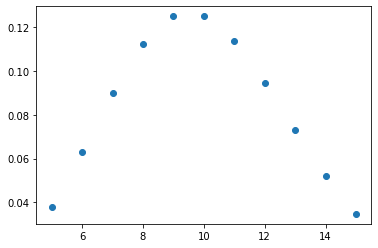

In [ ]:
from scipy.stats import poisson


mu = 10 # expectation per unit of time. Having then 10 uci in a month
poisson_dist=poisson(mu)
print(poisson_dist.pmf(10))
print(poisson_dist.pmf(5))
print(poisson_dist.pmf(15))

print(1-poisson_dist.cdf(12))
#print(poisson_dist.cdf(15))

#attention to mean AND variance
#print(poisson_dist.mean())
#print(poisson_dist.var())
#print(poisson_dist.std())

print(poisson_dist.rvs(15))

x = np.arange(5,16)
plt.plot(x, poisson_dist.pmf(x),"o")
#plt.plot(x, poisson_dist.cdf(x),"o")

In [ ]:

# Example
# our call centre takes on average 2 calls per hour. 
# to be safe, we designed it to have capacity of taking 5 calls per hour
# what is the likelyhood of being overwhelmed in an hour?

mu=2
poisson_dist=poisson(mu)
1-poisson_dist.cdf(5)

0.016563608480614445

In [ ]:
# Extra
# what is the chance of being overwhelmed at some point during the day? Assume 12 hours of operation.

p = 1-poisson_dist.cdf(5)
n = 12
binomial_dist = binom(n,p)
1-binomial_dist.pmf(0)

0.1816194466978427

# Continuous Distribution

**Cumulative Distribution Function (CDF)** (def) of a random variable.
> F<sub>X</sub>(x) = P(X >= x)   for all x E IR

For all a <= b we have P(a < X <= b) = F <sub>X</sub>(b) - F <sub>X</sub>(a)

**Expectation** is the average in probability-talk

**Variance** How spread out the distribution of a random variable is. 



## Uniform Distribution

### Standard Uniform Distribution

Like the Bernoulli, mostly used to build other distributions, but can be interesting to generate fair lots.

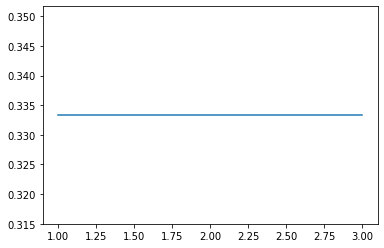

In [ ]:
# e.g. Random number generator. Every variable has an equal chance of happening. However, there is an infinite number of points that can exist.

a=1
b=3
x = np.linspace(a,b, 100) Return evenly spaced numbers over a specified interval.
y = uniform.pdf(x, a, b)
plt.plot(x, y)

## Exponential Distribution

Used to model time until next event  in situations situations where events occur with a constant probability per unit of time: arrivals at a queue, calls at call center,  radioactive particles decay. Notice the relation with Poisson.

In [ ]:
# uber example: how much time to recommend waiting

## You happen to know that the expected time to wait for a uber in santa apolonia on a Saturday is 2 min.
## And when you call a uber, ube wants to offer an extimation on how much you have to waut for a car to arraive.
## Should ube say you ae going to wait 2 min.
## NO!

## Because if you wait 1 min you will be ok with uber, but if you wait 10 min you will be angry.
## So what uber should say is a time that 95% of the time is the correct one. So that you only have 5% angry with you.
## The way to do this is with an exponetial distribution 



0.9932620530009145
[0.1162769  0.09364637 0.25517564 0.92120669 0.44142543 0.77469822
 0.4564679  0.95134267 0.50537672 1.97486552]


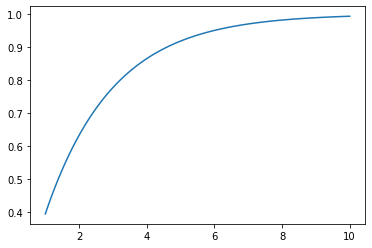

In [ ]:
from scipy.stats import expon

lambda_inv = 2 # 2 min for a car 
#lambda is the rate, lambda_inv is the expectation per time. 
#e.g. if the rate is one call every 30 mins, the expectation is 2 calls per hour (unit of time)
exp_distribution = expon(scale=lambda_inv) 

#print(exp_distribution.cdf(2))
print(exp_distribution.cdf(10))          
print(exp_distribution.rvs(10)) 

# plotting
x = np.linspace(1,10,100)
y = exp_distribution.cdf(x)
plt.plot(x,y)

In [ ]:
exp_distribution.ppf(0.95)
exp_distribution.cdf(5.99146454710798)

0.95

In [ ]:
# Example
# the game is going great. 80 minutes in and 6 goals were already scored
# what is the chance that another goal is scored in the next 10 mins?

# unit of time = mins
# expectation so far = 6 goals per 80 units of time = 6/80 -> rate 

lambda_inv = 80/6
exp_distribution = expon(scale=lambda_inv) 

exp_distribution.cdf(10)

#what if the game goes for 3' time compensation

#exp_distribution.cdf(13)

0.622807646436843

## Gaussian Distribution

Models some physical phenomena, like how the particles distribute themselves in the process of diffusion, but most importantly is the limit distribution for many repetitions of trials and even more importantly, for the distribution of errors centered around the mean (CLT)



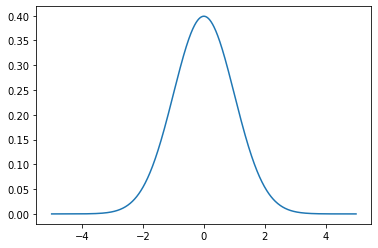

In [ ]:
mu=0
sigma=1
normal_dist = norm(mu, sigma) 

#print(normal_dist.pdf(2))
#print(normal_dist.cdf(4))       
#print(normal_dist.rvs(15)) 

# plotting
x = np.linspace(-5,5,1000)
y = norm.pdf(x) # pdf is the same as the pmf for the continuous distributions
plt.plot(x,y)
plt.show()